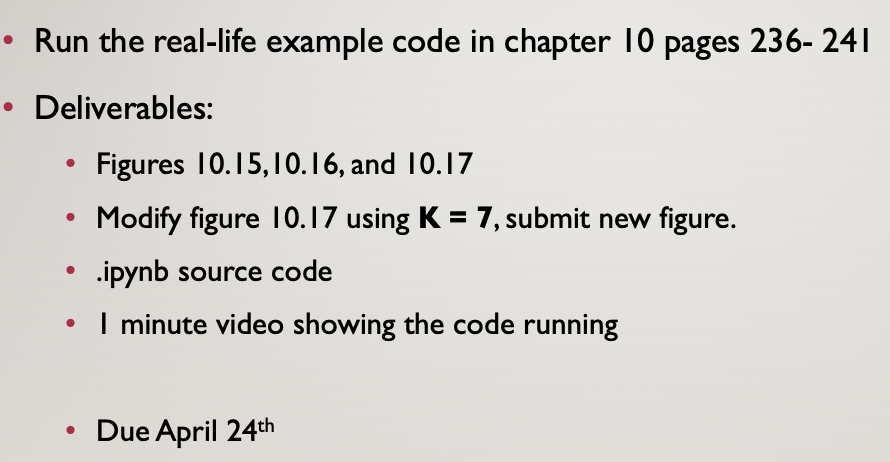

## Marcos Hernandez
### Using K-Means to Solve Real-Life Problems

### Real world use case:


#### Problem:
A clothing designer would like to design some new shorts. An important design problem would be to come up with the series of sizes that can fit most people. Essentially a  series of sizes of people with different:
* Waist Circumference
* Upper Leg Length

You need to find the right combination of sizes.

#### Solution:
The K-Means algorithm can be used to solve this problem. 

* Obtain a dataset containing measurements of a group of people (of certain age range).
* Apply the K-Means algorithm to group these people into clusters based on specific measurement of their body parts.
* Once the cluster are found, they can be used to get a clear picture of the sizes that need to be designed.

#### Dataset:
The dataset has 27 columns and 9338 rows. We will focus on two of them:
* BMXWAIST: Waist Circumference(cm)
* BMXLEG: Upper Leg Length(cm)

The dataset can also be found here: https://data.world/rhoyt/body-measurements
